# High Impact Keywords that Maximize Profit

## Import data

In [1]:
# Tyler Powell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read in data 
data = pd.read_csv('tmdb_movies_data.csv')

## Process Data

In [2]:
# Tyler Powell

# Fill in missing features
num_cols = ['budget_adj', 'revenue_adj']
for col in num_cols:
        mean = data[col].mean()
        data[col].fillna(mean, inplace=True)

# Calculate difference between revenue_adj and budget_adj to create profit column
data['profit'] = data['revenue_adj'] - data['budget_adj']
data['profit'] = data['profit'].round()

# Parse keywords column
data['keyword_list'] = data['keywords'].str.split('|')

# Replace missing values with empty string
data['keywords'].fillna('no_value', inplace=True)

# Save updata data to new CSV file
data.to_csv('updated_data.csv', index=False)

## Linear Regression

In [3]:
# Tyler Powell

#Linear Regression 

#create a method to measure the data
#Each keyword will receive a score. If the keyword occurs in a movie where the profit is positive, 
#the score will go up .1, if the movie loses money it will go down .1. 
#Each score will then be used to calculate a keyword score for each movie, the sum of their keywords.

#We will then attempt to map the keyword scores to the profit of a movie via linear regression

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from math import isnan

In [4]:
# Tyler Powell

#Split the data
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [5]:
#  Tyler Powell

#Create the scores maps for the keywords training data
keywordScoresTrain = {}

for i in range(0, train.shape[0]):
    profit = train.iloc[i]["profit"]
    
    if(type(train.iloc[i]["keyword_list"]) is list):
        for word in train.iloc[i]["keyword_list"]:
            if word not in keywordScoresTrain:
                keywordScoresTrain[word] = 0.0
            if(profit > 0):
                keywordScoresTrain[word] += .1
            elif(profit < 0):
                keywordScoresTrain[word] -= .1

In [6]:
# Tyler Powell
#Create the scores maps for the keywords testing data

keywordScoresTest = {}

for i in range(test.shape[0]):
    profit = test.iloc[i]["profit"]
    
    if(type(test.iloc[i]["keyword_list"]) is list):
        for word in test.iloc[i]["keyword_list"]:
            if word not in keywordScoresTest:
                keywordScoresTest[word] = 0.0
            if(profit > 0):
                keywordScoresTest[word] += .1
            elif(profit < 0):
                keywordScoresTest[word] -= .1

In [7]:
# Tyler Powell
#Create the movie scores for the training data

movieScoresTrain = []
movieProfitsTrain = []

for i in range(train.shape[0]):
    keywordScoreTrain = 0
    
    
    if(type(train.iloc[i]["keyword_list"]) is list):
        for word in train.iloc[i]["keyword_list"]:
            keywordScoreTrain += keywordScoresTrain[word]
    
        movieScoresTrain.append(keywordScoreTrain)
        movieProfitsTrain.append(train.iloc[i]["profit"])

In [8]:
# Tyler Powell
#Create the movie scores for the testing data

movieScoresTest = []
movieProfitsTest = []

for i in range(test.shape[0]):
    keywordScoreTest = 0
    
    if(type(test.iloc[i]["keyword_list"]) is list):
        for word in test.iloc[i]["keyword_list"]:
            keywordScoreTest += keywordScoresTest[word]
    
        movieScoresTest.append(keywordScoreTest)
        movieProfitsTest.append(test.iloc[i]["profit"])

In [9]:
# Tyler Powell
# transform the data
x = np.array(movieScoresTrain).reshape((-1, 1))
y = np.array(movieProfitsTrain)

model = LinearRegression()

In [10]:
# Tyler Powell
#fit the model and view the initial model values
model = LinearRegression().fit(x, y)


coef = model.score(x,y)
slope = model.coef_
intercept = model.intercept_
print("The fit model has the following attributes")
print(f"Coefficient: {coef}")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

The fit model has the following attributes
Coefficient: 0.04440346444680365
Slope: [12120723.21433125]
Intercept: 17195505.27828345


In [11]:
# Tyler Powell
#Create the predictions of profits
# create predicitions

predicting_x = np.array(movieScoresTest).reshape((-1,1))
predicted_profits = model.predict(predicting_x)

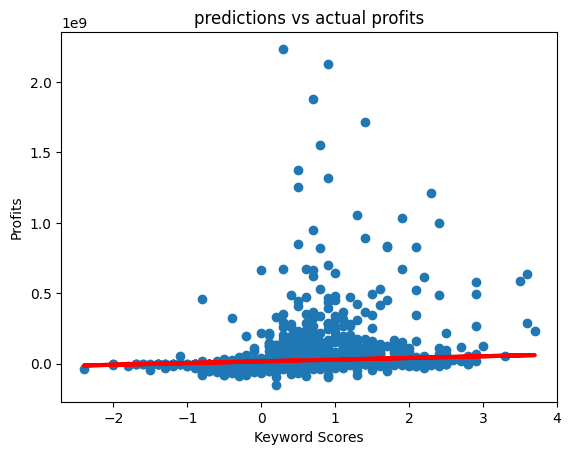

In [12]:
# Tyler Powell
#plot the comparison

import matplotlib.pyplot as plt


plt.ylabel('Profits')
plt.xlabel('Keyword Scores')
plt.title("predictions vs actual profits")
plt.scatter( movieScoresTest,movieProfitsTest,)
plt.plot(predicting_x, predicted_profits, 'r', linewidth=3)
plt.show()

In [14]:
# Tyler Powell
#Viewing error for the model

summedValue = 0

for i in range (0,len(movieProfitsTest)): 
    diff = movieProfitsTest[i] - predicted_profits.flatten()[i]
    diffSquared = diff**2  
    summedValue = summedValue + diffSquared  

mse = summedValue/len(movieProfitsTest)

print(f"In this model our MSE was {mse}")

print("\nThis large value for MSE shows us that the correlation in this model of keywords having an impact on movie profits likely does not have a direct impact on the amount of money made by a film.")

In this model our MSE was 2.4744624080208276e+16

This large value for MSE shows us that the correlation in this model of keywords having an impact on movie profits likely does not have a direct impact on the amount of money made by a film.
